Importing Libraries

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

Loading the data

In [2]:
df_house = pd.read_excel('1553768847_housing.xlsx')
df_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
import math
print(math.log(452600))

13.022764012181574


In [4]:
from pandas.core.computation.pytables import Index
df_house.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

**Hanldling the missing Values**

In [5]:
df_house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

It is observed that there are 207 missing values in 'total_bedrooms' column. Replace the nell values with the mean.

In [6]:
df_house.total_bedrooms=df_house.total_bedrooms.fillna(df_house.total_bedrooms.mean())
df_house.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

Converitng the categorical column in the dataset to numerical data

In [7]:
le = LabelEncoder()
df_house['ocean_proximity']=le.fit_transform(df_house['ocean_proximity'])

Standardising the training and test datasets

In [8]:
names=df_house.columns                                    #Column name first
scaler=StandardScaler()                                   #Creating Scale 
scaled_df=scaler.fit_transform(df_house)                  #Fitting data on Scaler object
scaled_df=pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,1.291089,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.291089,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.291089,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.291089,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.291089,1.172900


Checking for linearity

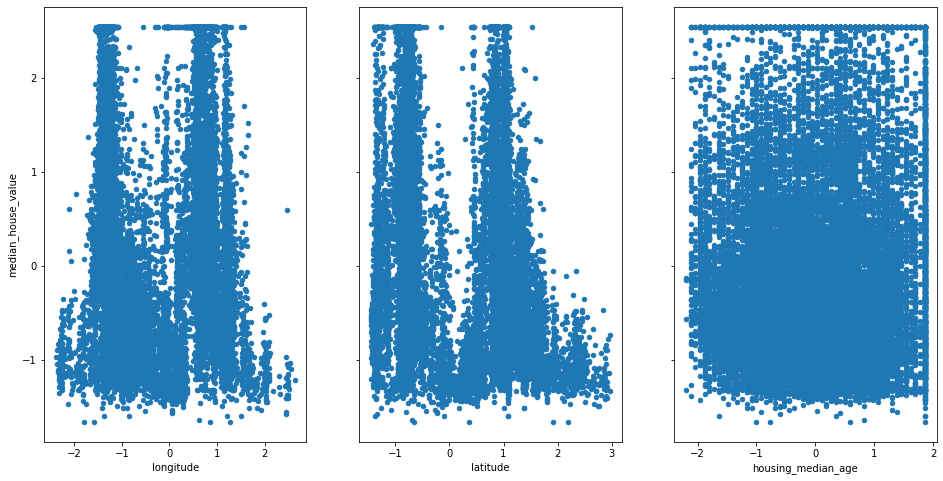

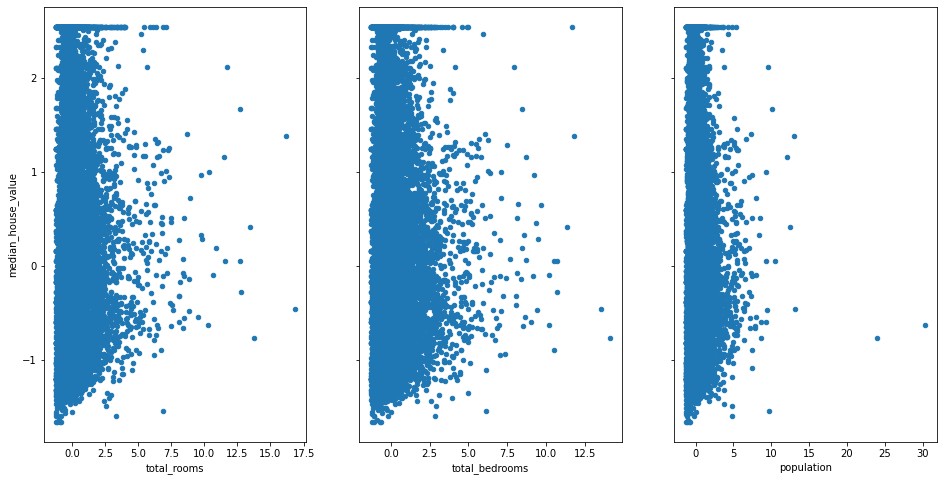

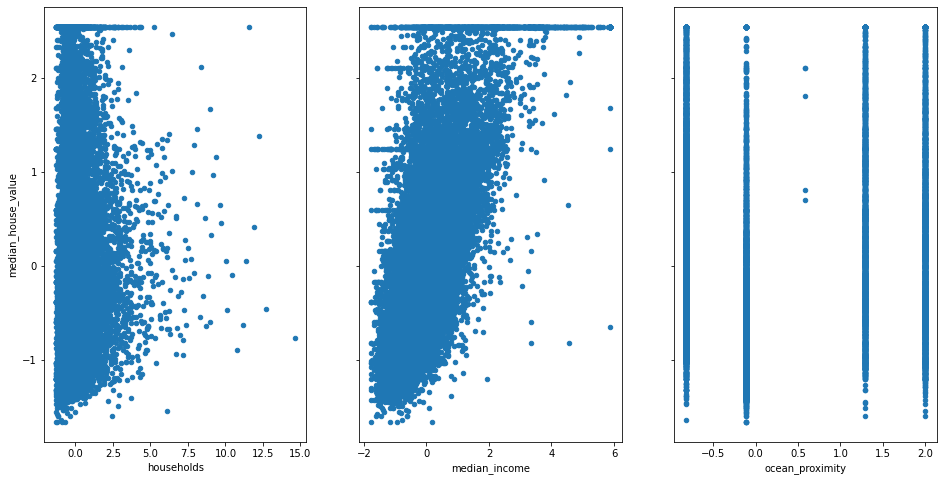

In [9]:
#plot graphs
fig,axs=plt.subplots(1,3,sharey=True)
scaled_df.plot(kind='scatter',x='longitude',y='median_house_value',ax=axs[0],figsize=(16,8))
scaled_df.plot(kind='scatter',x='latitude',y='median_house_value',ax=axs[1],figsize=(16,8))
scaled_df.plot(kind='scatter',x='housing_median_age',y='median_house_value',ax=axs[2],figsize=(16,8))

#plot graphs
fig,axs=plt.subplots(1,3,sharey=True)
scaled_df.plot(kind='scatter',x='total_rooms',y='median_house_value',ax=axs[0],figsize=(16,8))
scaled_df.plot(kind='scatter',x='total_bedrooms',y='median_house_value',ax=axs[1],figsize=(16,8))
scaled_df.plot(kind='scatter',x='population',y='median_house_value',ax=axs[2],figsize=(16,8))

#plot graphs
fig,axs=plt.subplots(1,3,sharey=True)
scaled_df.plot(kind='scatter',x='households',y='median_house_value',ax=axs[0],figsize=(16,8))
scaled_df.plot(kind='scatter',x='median_income',y='median_house_value',ax=axs[1],figsize=(16,8))
scaled_df.plot(kind='scatter',x='ocean_proximity',y='median_house_value',ax=axs[2],figsize=(16,8))

Only median_income and median_house value have a linear relationship, according to the aforementioned graphs.

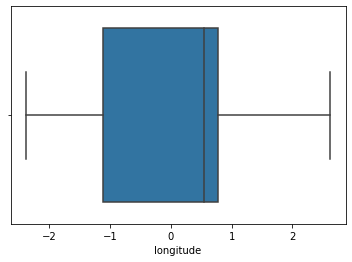

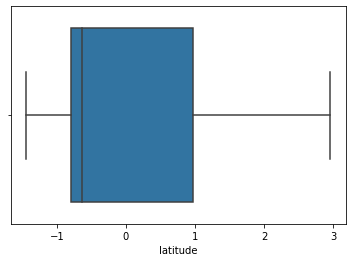

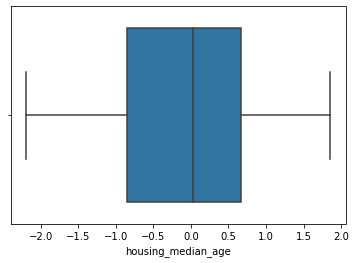

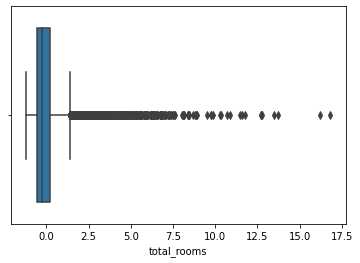

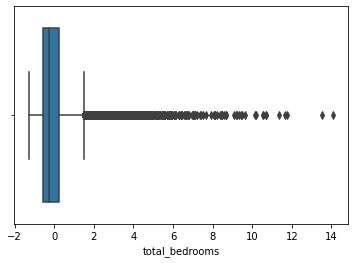

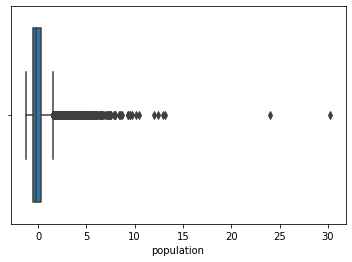

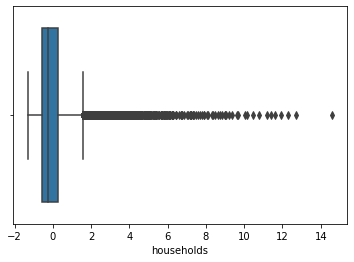

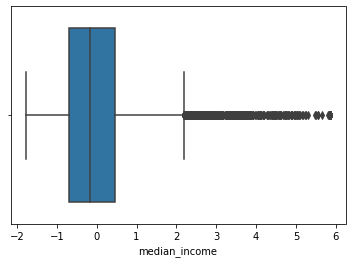

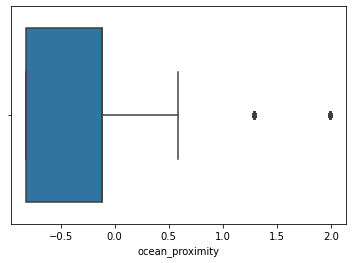

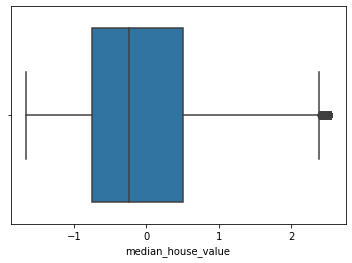

In [10]:
for column in scaled_df:                       #Check for outliers
  plt.figure()
  sns.boxplot(x=scaled_df[column])

Extract the input (X) and output (Y) data from the dataset

In [11]:
X_Features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']
X=scaled_df[X_Features]
Y=scaled_df['median_house_value']

print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [12]:
print(df_house.shape)
print(X.shape)
print(Y.shape)

(20640, 10)
(20640, 9)
(20640,)


Splitting the dataset into 80% training dataset and 20% test dataset

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(16512, 9) (16512,)
(4128, 9) (4128,)


### **Linear Regression** 

In [14]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
y_predict=linreg.predict(x_test)
print(sqrt(mean_squared_error(y_test, y_predict)))
print((r2_score(y_test, y_predict)))

0.6056598120301221
0.6276223517950296


## **Decision Tree Regression**

In [18]:
dtreg=DecisionTreeRegressor()
dtreg.fit(x_train,y_train)
y_predict=dtreg.predict(x_test)
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

0.5973289393460376
0.637796033680343


## **Random Forest Regression**

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
rfreg=RandomForestRegressor()
rfreg.fit(x_train,y_train)
y_predict=rfreg.predict(x_test)
print(sqrt(mean_squared_error(y_test,y_predict)))
print(r2_score(y_test,y_predict))

0.42551589952989105
0.8161948505025981


## **Lasso Regression**

In [29]:
lassoreg=Lasso(alpha=0.001,normalize=True)
lassoreg.fit(x_train,y_train)
print(sqrt(mean_squared_error(y_test,lassoreg.predict(x_test))))
print('R2 coefficient of determination:{}'.format(lassoreg.score(x_test,y_test)))

0.719314096707071
R2 coefficient of determination:0.4747534206169961


## **Ridge Regression**

In [35]:
ridgereg=Ridge(alpha=0.001,normalize=True)
ridgereg.fit(x_train,y_train)
print(sqrt(mean_squared_error(y_test,ridgereg.predict(x_test))))
print('R2 coefficient of determinatio:{}'.format(ridgereg.score(x_test,y_test)))

0.6056048844852343
R2 coefficient of determinatio:0.6276898909055972


## **ElasticNet Regression**

In [37]:
from sklearn.linear_model import ElasticNet
elasticreg=ElasticNet(alpha=0.001,normalize=True)
elasticreg.fit(x_train,y_train)
print(sqrt(mean_squared_error(y_test,elasticreg.predict(x_test))))
print('R2 coefficient of etermination:{}'.format(elasticreg.score(x_test,y_test)))

0.9443581693981061
R2 coefficient of etermination:0.0946852980670454


#**Hypothesis testing and value of P**

In [38]:
lm=smf.ols(formula='median_house_value ~ longitude+latitude+housing_median_age+total_rooms+total_bedrooms+population+households+median_income+ocean_proximity',data=scaled_df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     3999.
Date:                Wed, 24 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:46:22   Log-Likelihood:                -18868.
No. Observations:               20640   AIC:                         3.776e+04
Df Residuals:                   20630   BIC:                         3.783e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.469e-17      0.004  -8.26e-15      1.000      -0.008       0.008
longitude             -0.7393      0.013    -57.263      0.000      -0.765      -0.714
latitude              -0.7858      0.013    -61.664      0.000      -0.811      -0.761
housing_median_age     0.1248      0.005     26.447      0.000       0.116       0.134
total_rooms           -0.1265      0.015     -8.609      0.000      -0.155      -0.098
total_bedrooms         0.2995      0.022     13.630      0.000       0.256       0.343
population            -0.3907      0.011    -36.927      0.000      -0.411      -0.370
households             0.2589      0.022     11.515      0.000       0.215       0.303
median_income          0.6549      0.005    119.287      0.000       0.644       0.666
ocean_proximity        0.0009      0.005      0.190      0.850      -0.008       0.010
==============================================================================
Omnibus:                     5037.491   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18953.000
Skew:                           1.184   Prob(JB):                         0.00
Kurtosis:                       7.054   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **Linear Regression with one independent variable**

In [39]:
x_train_Income=x_train[['median_income']]
x_test_Income=x_test[['median_income']]
print(x_train_Income.shape)
print(y_train.shape)

(16512, 1)
(16512,)


Relation between features

In [40]:
linreg=LinearRegression()
linreg.fit(x_train_Income,y_train)
y_predict = linreg.predict(x_test_Income)
#print intercept and coefficient of the linear equation
print(linreg.intercept_, linreg.coef_)
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

0.005623019866893164 [0.69238221]
0.7212595914243148
0.47190835934467734


Graphing least square line

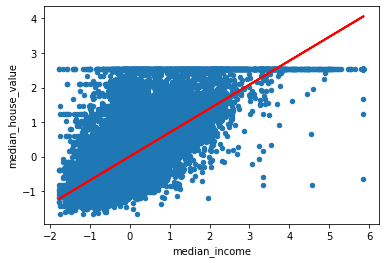

In [41]:
scaled_df.plot(kind='scatter',x='median_income',y='median_house_value')
plt.plot(x_test_Income,y_predict,c='red',linewidth=2)

# **Hypothesis testig and value of P**

In [44]:
lm=smf.ols(formula='median_house_value ~ median_income',data=scaled_df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Wed, 24 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:50:57   Log-Likelihood:                -22668.
No. Observations:               20640   AIC:                         4.534e+04
Df Residuals:                   20638   BIC:                         4.536e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.735e-16      0.005   3.43e-14      1.000      -0.010       0.010
median_income     0.6881      0.005    136.223      0.000       0.678       0.698
==============================================================================
Omnibus:                     4245.795   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9273.446
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       5.260   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""